In [5]:
from transform import *
from data import *
from model import *
from tools import *
import torch.optim as optim
from tensorboardX import SummaryWriter

import warnings
warnings.filterwarnings("ignore")

In [6]:
root1 = '/home/whale/dataset/Landmark/300W'
root2 = '/home/whale/dataset/Landmark/300W_LP'

train1 = os.path.join(root1, "train.xml")
test1 = os.path.join(root1, "test.xml")
train2 = os.path.join(root2, "train.txt")
test2 = os.path.join(root2, "test.txt")
tran1 = transforms.Compose([CropByLDK(1.4), Flip(), RandomCrop(0.7), Rescale((64,64)), ToTensor(), Normalize()])
tran2 = transforms.Compose([CropByLDK(1.4), RandomCrop(0.7), Rescale((64,64)), ToTensor(), Normalize()])
tran3 = transforms.Compose([CropByLDK(1.4), Rotate(30), RandomCrop(0.7), Rescale((64,64)), ToTensor(), Normalize()])
tran4 = transforms.Compose([CropByLDK(1.4), Rotate(-30), RandomCrop(0.7), Rescale((64,64)), ToTensor(), Normalize()])
tran_test = transforms.Compose([CropByLDK(1.4), RandomCrop(0.7), Rescale((64,64)), ToTensor(), Normalize()])
augumentation = [tran1, tran2, tran3, tran4]

epoch:0 iteration:199 loss:0.0418635144457
epoch:0 iteration:399 loss:0.0250330242049
epoch:0 iteration:599 loss:0.0215574245248
epoch:0 iteration:799 loss:0.0196432985831
epoch:0 iteration:999 loss:0.0185808268469
epoch:0 iteration:1199 loss:0.017668705117
epoch:0 iteration:1399 loss:0.0169147968991
epoch:0 iteration:1599 loss:0.0169172598515
epoch:0 iteration:1799 loss:0.0160406631697
epoch:0 iteration:1999 loss:0.0157156389253
epoch:0 iteration:2199 loss:0.0150833085645
epoch:0 iteration:2399 loss:0.0149496574793
epoch:0 iteration:2599 loss:0.0145095167682
epoch:0 iteration:2799 loss:0.0141589048784
epoch:0 iteration:2999 loss:0.0143762856862
epoch:0 iteration:3199 loss:0.0140366729908
epoch:0 iteration:3399 loss:0.0135178944282
epoch:0 iteration:3599 loss:0.013339427677
epoch:0 iteration:3799 loss:0.0133636901202
epoch:0 iteration:3999 loss:0.0130703171156
epoch:0 iteration:4199 loss:0.0130059623462
epoch:0 iteration:4399 loss:0.0129761176789
epoch:0 iteration:4599 loss:0.012651362

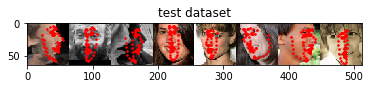

epoch:1 iteration:199 loss:0.01197825643
epoch:1 iteration:399 loss:0.0117946029082
epoch:1 iteration:599 loss:0.01178461086
epoch:1 iteration:799 loss:0.0116747226473
epoch:1 iteration:999 loss:0.0117120708805
epoch:1 iteration:1199 loss:0.0115890326654
epoch:1 iteration:1399 loss:0.0112542307773


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
writer = SummaryWriter(log_dir='logs')
#augumentation
trains = []
tests = []
for tran in augumentation:
    trains.append(Ldk_300W_LP_Dataset(train2, root2, tran))
    trains.append(Ldk_300W_Dataset(train1, root1, tran))
    
tests.append(Ldk_300W_LP_Dataset(test2, root2, tran_test))
tests.append(Ldk_300W_Dataset(test1, root1, tran_test))
    

trainset = Dataset_combined(trains)
testset = Dataset_combined(tests)

net= MobileNetV2() 
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
save_path = '/home/whale/workspace/torch/mobile-landmark/landmark.pth'

epoch, batch_size = 30, 32

train(device, net, criterion, optimizer, trainset, testset, epoch, batch_size, save_path, writer)